In [70]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
#feature and dimension expand, why?
#what if we only use original features?
#Assume we have three orignal features: amt, paymtd, paytype
#dictionary for each feature is as following:
##Amt:0-9
##Paymtd:0-9
##Paytype:0-9
##RecorPay:0-9
#suppose we have three class of txn as following:
##txn_class1:Amt always in bin 0
##txn_class1:Amt always in bin 5
##txn_class1:Amt always in bin 9
###We want to use our models to find such three kinds of txn_class
def txn_class1():
    amt=np.random.choice(10,1,p=[0.0,0.0,0.0,0.0,0.0,
                                0.0,0.0,0.1,0.1,0.8])[0]
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]


def txn_class2():
    amt=np.random.choice(10,1,p=[0.8,0.1,0.1,0.0,0.0,
                                0.0,0.0,0.0,0.0,0.0])[0]
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]

def txn_class3():
    amt=np.random.choice(10,1,p=[0.0,0.0,0.0,0.0,1.0,
                                0.0,0.0,0.0,0.0,0.0])[0]
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]


class Sythetic:
    def __init__(self):
        print('Sythetic instance created!')
        
    def Kmeans(self,data,K,plt):
        sse = {}
        t0=time()
        for k in range(1, K+1):
            kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
            sse[k] = kmeans.inertia_ 
        t1=time()
        plt.plot(list(sse.keys()), list(sse.values()))
        plt.set_title('Kmeans')
        plt.set_xlabel("Number of cluster")
        plt.set_ylabel("SSE")
        print('Kmeans running time:%f sec!'%(t1-t0))
        return sse
        
          
        
    def SVD(self,data,K,plt):
        t0=time()
        svd=TruncatedSVD(n_components=K,random_state=0)
        svd.fit(data)
        sigma=svd.singular_values_
        t1=time()
        plt.plot(sigma)
        plt.set_title('SVD')
        plt.set_xlabel("Number of cluster")
        plt.set_ylabel("Singular Value")
        print('SVD running time:%f sec!'%(t1-t0))
        return sigma, svd.explained_variance_ratio_,svd.explained_variance_ratio_.sum()
        
    
    def PCA(self,data,K,plt):
        t0=time()
        pca = PCA(n_components=K)
        pca.fit(data)
        sigma=pca.singular_values_
        t1=time()
        plt.plot(sigma)
        plt.set_title('PCA')
        plt.set_xlabel("Number of cluster")
        plt.set_ylabel("Singular Value")
        print('PCA running time:%f sec!'%(t1-t0))
        return sigma, pca.explained_variance_ratio_,pca.explained_variance_ratio_.sum()
        
    def NMF(self,data,K,plt):
        re = {}
        t0=time()
        for k in range(1, K+1):
            nmf = NMF(n_components=k, max_iter=1000).fit(data)
            re[k] = nmf.reconstruction_err_  
        t1=time()
        plt.plot(list(re.keys()), list(re.values()))
        plt.set_title('NMF')
        plt.set_xlabel("Number of cluster")
        plt.set_ylabel("Reconstruction-error")
        print('NMF running time:%f sec!'%(t1-t0))
        return re
            
s=Sythetic()

Sythetic instance created!


In [23]:
data=[txn_class1() for i in range(3000)]
data.extend([txn_class2() for i in range(3000)])
data.extend([txn_class3() for i in range(3000)])

Sythetic instance created!


Kmeans running time:1.395068 sec!
SVD running time:0.018001 sec!
PCA running time:0.013001 sec!
NMF running time:1.242072 sec!


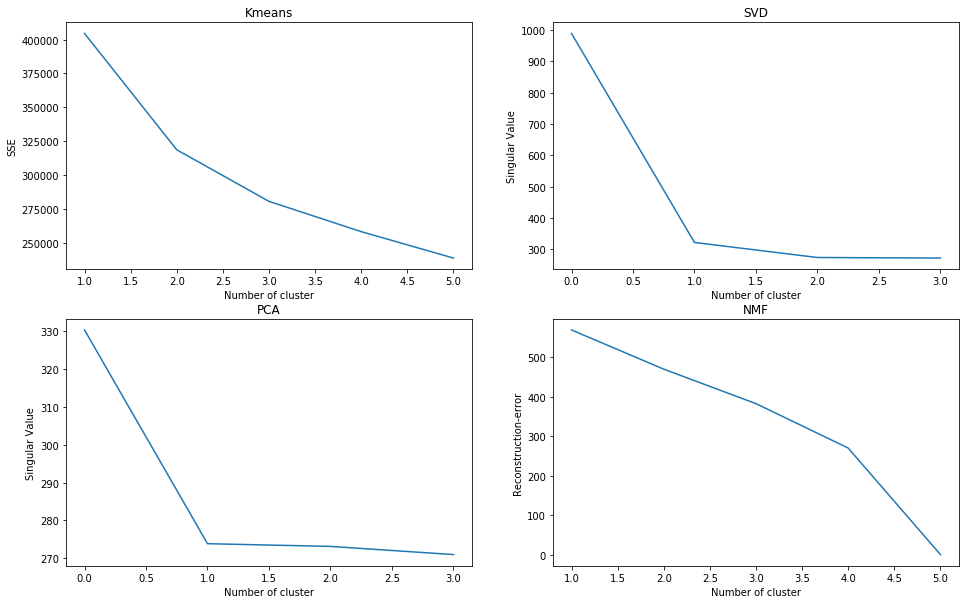

In [71]:
fig = plt.figure(figsize=(16, 10))
ax1=fig.add_subplot(221)
s.Kmeans(data,5,ax1)
ax2=fig.add_subplot(222)
s.SVD(data,4,ax2)
ax3=fig.add_subplot(223)
s.PCA(data,4,ax3)
ax4=fig.add_subplot(224)
s.NMF(data,5,ax4)
plt.show()

In [57]:
#####perform feature expand by dummy######
data_df=pd.DataFrame(data)
data_dummy=pd.get_dummies(data_df,columns=[0,1,2,3,4])
data_dummy.head(3)

,0_0,0_1,0_2,0_4,0_7,0_8,0_9,1_0,1_1,1_2,...,4_0,4_1,4_2,4_3,4_4,4_5,4_6,4_7,4_8,4_9
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Kmeans running time:8.341469 sec!
SVD running time:0.076005 sec!
PCA running time:0.045003 sec!
NMF running time:9.878567 sec!


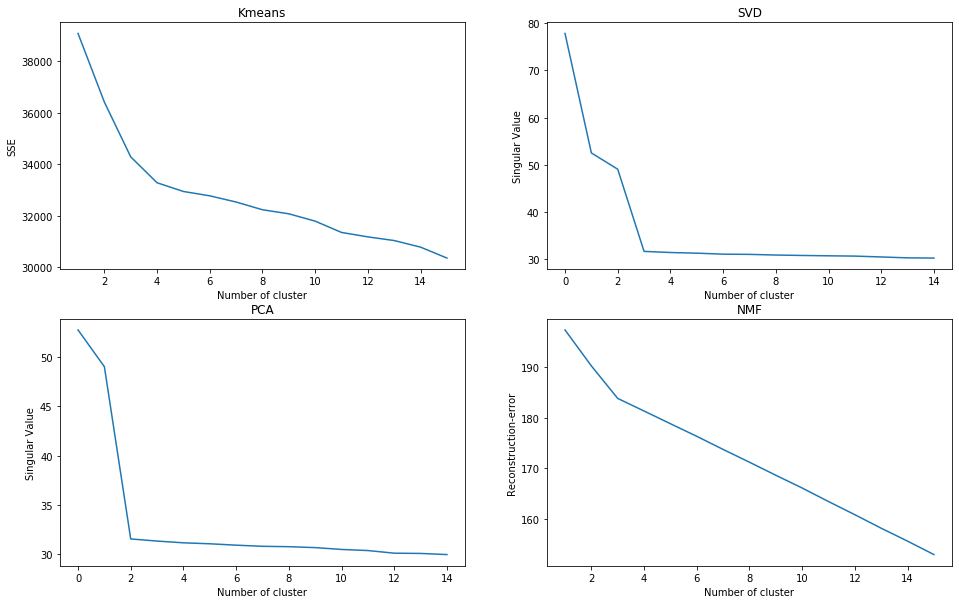

In [72]:
fig = plt.figure(figsize=(16, 10))
ax1=fig.add_subplot(221)
s.Kmeans(data_dummy,15,ax1)
ax2=fig.add_subplot(222)
s.SVD(data_dummy,15,ax2)
ax3=fig.add_subplot(223)
s.PCA(data_dummy,15,ax3)
ax4=fig.add_subplot(224)
s.NMF(data_dummy,15,ax4)
plt.show()